In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(filepath)

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       201 non-null    int64  
 1   Unnamed: 0         201 non-null    int64  
 2   symboling          201 non-null    int64  
 3   normalized-losses  201 non-null    int64  
 4   make               201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       201 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

In [5]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [6]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


## Functions for Plotting

In [8]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [9]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 6
    height = 5
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.legend()
    plt.show()
    plt.close()

In [10]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform): # lr: linear regression object, poly_transform: polynomial transformation object
    width = 8
    height = 6
    plt.figure(figsize=(width, height))
    
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data') # Тренувальні дані будуються як червоні крапки 'ro'
    plt.plot(xtest, y_test, 'go', label='Test Data') # Тестові дані будуються як зелені крапки 'go'
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

Функція PollyPlot будує графік для поліноміальної регресії, порівнюючи фактичні дані (тренувальні та тестові) з передбаченими значеннями, які отримані за допомогою лінійної регресії та поліноміального перетворення.

# Part 1: Training and Testing

An important step in model testing is to split the data into training and testing data. We will place the target data price in a separate dataframe y_data:

In [14]:
y_data = df['price']

In [15]:
x_data=df.drop('price',axis=1)

In [16]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   wheel-base         201 non-null    float64
 3   length             201 non-null    float64
 4   width              201 non-null    float64
 5   height             201 non-null    float64
 6   curb-weight        201 non-null    int64  
 7   engine-size        201 non-null    int64  
 8   bore               201 non-null    float64
 9   stroke             197 non-null    float64
 10  compression-ratio  201 non-null    float64
 11  horsepower         201 non-null    float64
 12  peak-rpm           201 non-null    float64
 13  city-mpg           201 non-null    int64  
 14  highway-mpg        201 non-null    int64  
 15  city-L/100km       201 non-null    float64
 16  diesel             201 non

Now, we randomly split our data into training and testing data using the function train_test_split.

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1) # the testing set is 10% of the total dataset

print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 21
number of training samples: 180


In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples:", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples: 81
number of training samples: 120


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
# We create a Linear Regression object:
lre=LinearRegression()

In [22]:
# We fit the model using the feature "horsepower":
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [23]:
# Let's calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [24]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

We can see the R^2 is much smaller using the test data compared to the training data.

In [26]:
# Find the R^2 on the test data using 40% of the dataset for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)

LinearRegression()

In [27]:
lre.score(x_train1[['horsepower']],y_train1)

0.5754067463583004

In [28]:
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

## Cross-Validation Score

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4) # The parameter 'cv' determines the number of folds. In this case, it is 4.
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [32]:
# We can calculate the average and standard deviation of our estimate:
print("The mean of the folds is", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds is 0.522009915042119 and the standard deviation is 0.29118394447560286


In [33]:
Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rc.mean()

0.5166761697127429

Use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. 

In [35]:
from sklearn.model_selection import cross_val_predict

In [36]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Part 2: Overfitting, Underfitting and Model Selection

Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [39]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [40]:
# Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [41]:
# Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Let's perform some model evaluation using our training and testing data separately. 

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

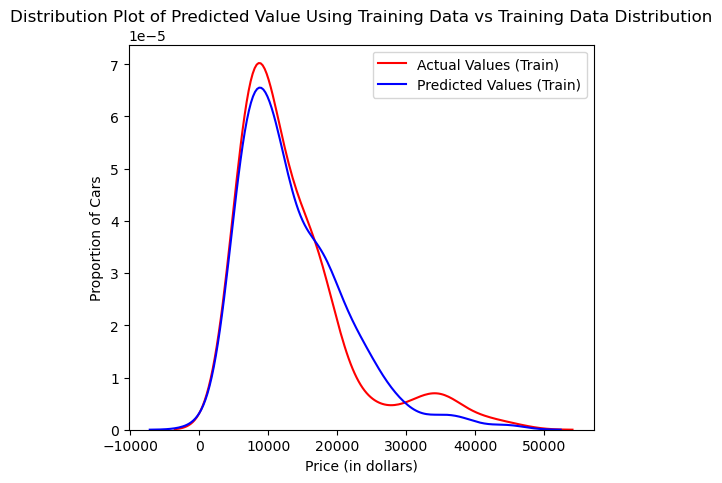

In [44]:
# Let's examine the distribution of the predicted values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.

So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

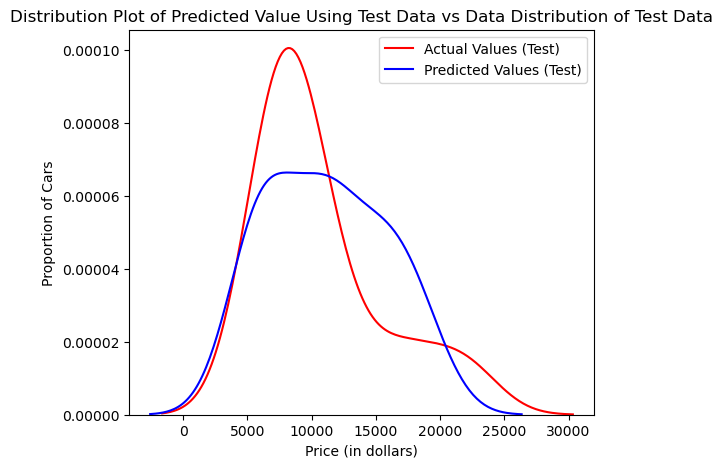

In [47]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.

Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [50]:
from sklearn.preprocessing import PolynomialFeatures

#### Overfitting

In [52]:
# Let's use 55 percent of the data for training and the rest for testing:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [53]:
# We will perform a degree 5 polynomial transformation on the feature 'horsepower'.
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [54]:
# Now, let's create a Linear Regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [55]:
yhat = poly.predict(x_test_pr)

In [56]:
# Let's take the first five predicted values and compare it to the actual targets.
print("Predicted values:", yhat[0:5])
print("True values:", y_test[0:5].values)

Predicted values: [ 6728.58615619  7307.91973653 12213.73734432 18893.37966315
 19996.10669225]
True values: [ 6295. 10698. 13860. 13499. 15750.]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

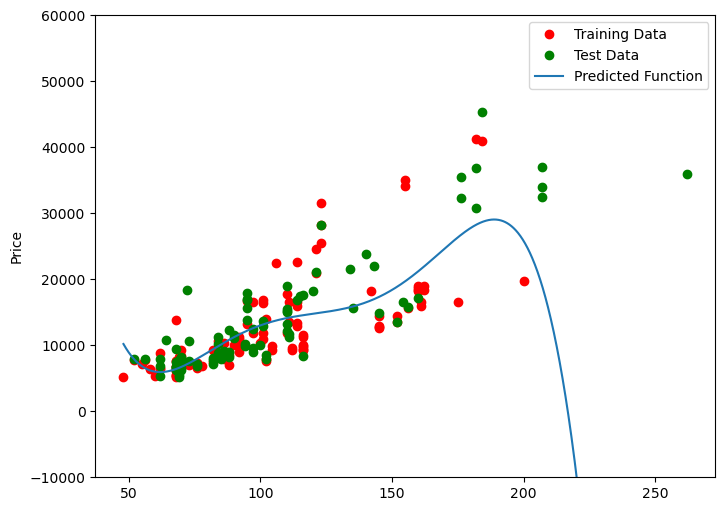

In [58]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [61]:
# R^2 of the training data:
poly.score(x_train_pr, y_train)

0.5567716897727109

In [62]:
# R^2 of the test data:
poly.score(x_test_pr, y_test)

-29.870994900857237

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model.

##### A negative R^2 is a sign of overfitting.

Text(3, 0.74, 'Maximum R^2')

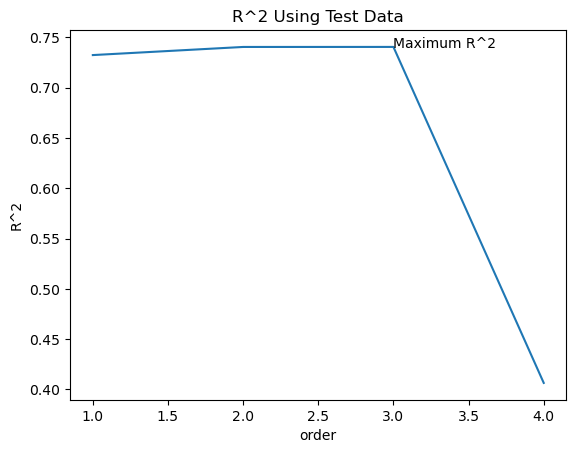

In [65]:
# Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:
Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.74, 'Maximum R^2') # текст "Maximum R^2" буде відображений у точці з координатами (3, 0.74)

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

In [67]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [68]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

The following interface allows to experiment with different polynomial orders and different amounts of data.

In [70]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [71]:
# We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.
pr1=PolynomialFeatures(degree=2)

In [72]:
# Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [73]:
x_train_pr1.shape # there are now 15 features instead of 4

(110, 15)

In [74]:
# Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.
poly1 = LinearRegression().fit(x_train_pr1, y_train)

In [75]:
# Use the method "predict" to predict an output on the polynomial features.
yhat_test1=poly1.predict(x_test_pr1)

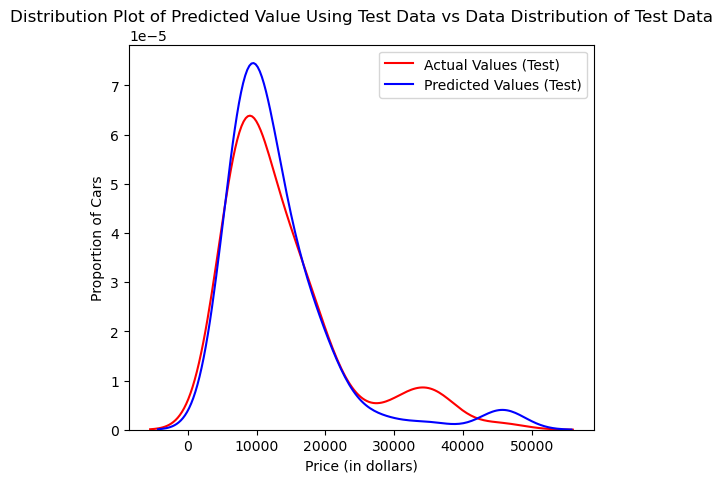

In [76]:
# Use the function DistributionPlot to display the distribution of the predicted test output vs. the actual test data.
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

The predicted value is higher than actual value for cars where the price 10,000 range, conversely the predicted price is lower than the price cost in the 30,000 to 40,000 range. As such the model is not as accurate in these ranges.

# Part 3: Ridge Regression

We will review Ridge Regression and see how the parameter alpha changes the model. Here our test data will be used as validation data.

In [80]:
# Let's perform a degree two polynomial transformation on our data.
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [81]:
from sklearn.linear_model import Ridge

In [82]:
# Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel=Ridge(alpha=0.1)

In [83]:
# Like regular regression, you can fit the model using the method fit.
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [84]:
yhat = RigeModel.predict(x_test_pr)

In [85]:
# Let's compare the first five predicted samples to our test set:
print('predicted:', yhat[0:5])
print('test set:', y_test[0:5].values)

predicted: [ 6567.83081933  9597.971514   20836.22326845 19347.69543463
 21402.65500378]
test set: [ 6295. 10698. 13860. 13499. 15750.]


In [86]:
RigeModel.score(x_test_pr, y_test)

0.5267273867513533

In [87]:
RigeModel.score(x_train_pr, y_train)

0.8710450895852535

We select the value of alpha that minimizes the test error. We can use a for loop. We have created a progress bar to see how many iterations we have completed so far.

In [89]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:02<00:00, 353.78it/s, Test Score=0.564, Train Score=0.859]


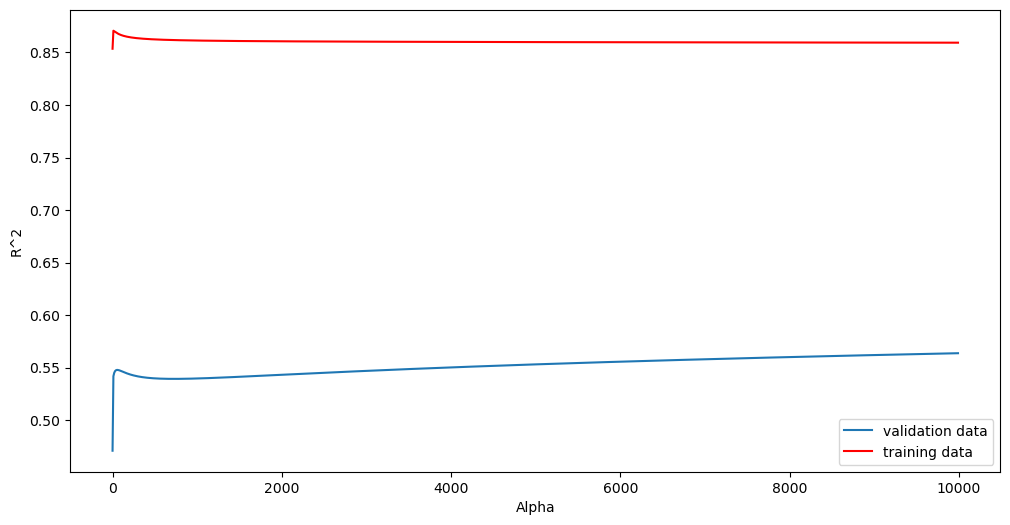

In [90]:
# We can plot out the value of R^2 for different alphas:
width = 12
height = 6
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training data')
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.legend()

Figure 4: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

The red line represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data.

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

In [93]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440208202

In [94]:
RigeModel.score(x_train_pr, y_train)

0.8706524475732123

In [95]:
RigeModel = Ridge(alpha=10000) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.563787255514596

In [96]:
RigeModel = Ridge(alpha=100000) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.6119630186724636

In [97]:
RigeModel.score(x_train_pr, y_train)

0.8561330394301596

# Part 4: Grid Search

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
# We create a dictionary of parameter values:
parameters1= [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [101]:
# Create a Ridge regression object:
RR=Ridge()
RR

Ridge()

In [102]:
# Create a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [103]:
# Fit the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR.

In [105]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [106]:
# We now test our model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.841164983103615